In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

In [0]:
import os

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# 집파일 압축 풀리면서 diractory 생성
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', 
                                      origin=_URL, 
                                      extract=True) # 압축풀기 여부 = true : 압축풀기!
# 경로 추적
data_dir = os.path.dirname(path_to_zip)
data_dir

68608000/68606236 [==============================] - 0s 0us/step


'/root/.keras/datasets'

In [0]:
# 경로 설정
base_dir = os.path.join(data_dir, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [0]:
print(os.listdir(train_cats_dir)[:5])
print(os.listdir(train_dogs_dir)[:5])

['cat.316.jpg', 'cat.247.jpg', 'cat.251.jpg', 'cat.927.jpg', 'cat.556.jpg']
['dog.508.jpg', 'dog.853.jpg', 'dog.210.jpg', 'dog.355.jpg', 'dog.339.jpg']


In [0]:
train_cats_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train/cats'

In [0]:
# 파일명 변수에 담기
train_cat_names = os.listdir(train_cats_dir)
train_dog_names = os.listdir(train_dogs_dir)

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

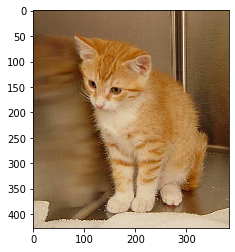

In [0]:
plt.figure()
img = mpimg.imread(train_cats_dir+'/'+train_cat_names[1])
plt.imshow(img)

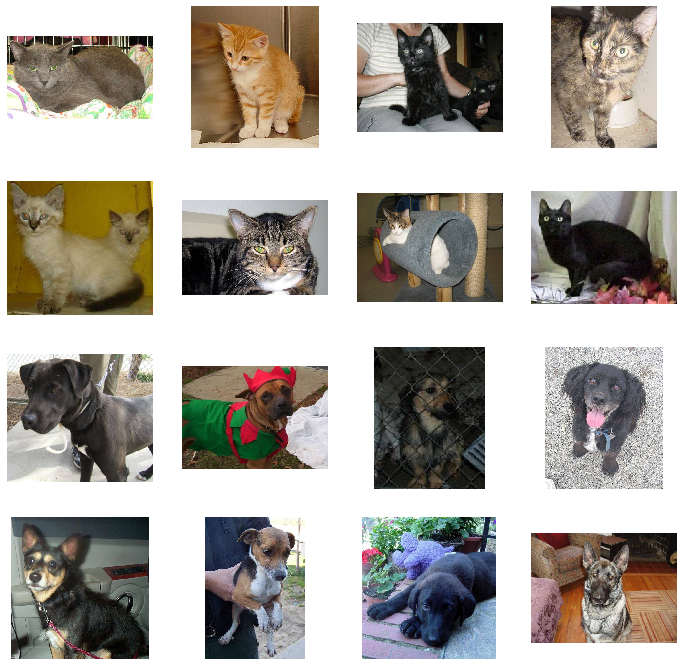

In [0]:
fig, ax = plt.subplots(4,4,figsize=(12,12))

# 리스트컴퓨레이션?
cats = [os.path.join(train_cats_dir, fname) for fname in train_cat_names[:8]]
dogs = [os.path.join(train_dogs_dir, fname) for fname in train_dog_names[:8]]
ax = ax.ravel()

for i, img_path in enumerate(cats + dogs): # enumerate : 몇번째+리스트 같이 반환
  img = mpimg.imread(img_path)
  ax[i].imshow(img)
  ax[i].axis('off')

In [0]:
# 사진의 크기가 제각각이고 사람이나 다른 물건과 섞여 있는 image 들이므로 150x150 size 로 규격화

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [0]:
# Data 전처리

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# training
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=15,
                              verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 15s - loss: 0.9111 - acc: 0.5420 - val_loss: 0.6951 - val_acc: 0.5270
Epoch 2/15
100/100 - 8s - loss: 0.6379 - acc: 0.6680 - val_loss: 0.5867 - val_acc: 0.6910
Epoch 3/15
100/100 - 8s - loss: 0.5366 - acc: 0.7300 - val_loss: 0.5638 - val_acc: 0.6990
Epoch 4/15
100/100 - 8s - loss: 0.4760 - acc: 0.7730 - val_loss: 0.5794 - val_acc: 0.7120
Epoch 5/15
100/100 - 8s - loss: 0.3839 - acc: 0.8250 - val_loss: 0.6925 - val_acc: 0.6690
Epoch 6/15
100/100 - 8s - loss: 0.3105 - acc: 0.8690 - val_loss: 0.7277 - val_acc: 0.7040
Epoch 7/15
100/100 - 8s - loss: 0.2220 - acc: 0.9145 - val_loss: 0.7440 - val_acc: 0.7120
Epoch 8/15
100/100 - 8s - loss: 0.1364 - acc: 0.9470 - val_loss: 0.9716 - val_acc: 0.7200
Epoch 9/15
100/100 - 8s - loss: 0.0939 - acc: 0.9705 - val_loss: 1.0837 - val_acc: 0.7220
Epoch 10/15
100/100 

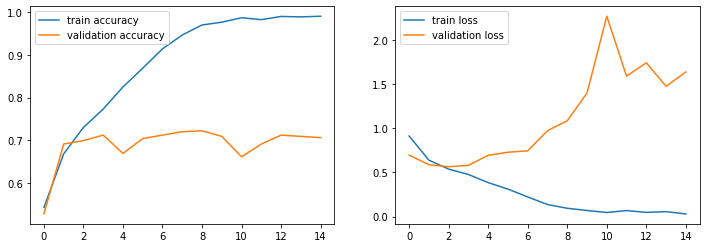

In [0]:
# Evaluating Accuracy and Loss for the Model

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.plot(history.history['acc'], label='train accuracy')
ax1.plot(history.history['val_acc'], label='validation accuracy')
ax1.legend()
# overfitting

ax2.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['val_loss'], label='validation loss')
ax2.legend()
# overfitting

In [0]:
# Data Augmentation 을 이용한 overfitting 해결
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,       
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=15,
                              verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 16s - loss: 0.7321 - acc: 0.6305 - val_loss: 0.5575 - val_acc: 0.7220
Epoch 2/15
100/100 - 16s - loss: 0.6086 - acc: 0.6815 - val_loss: 0.5552 - val_acc: 0.7280
Epoch 3/15
100/100 - 16s - loss: 0.6201 - acc: 0.6525 - val_loss: 0.5777 - val_acc: 0.7090
Epoch 4/15
100/100 - 16s - loss: 0.6027 - acc: 0.6920 - val_loss: 0.5505 - val_acc: 0.7070
Epoch 5/15
100/100 - 16s - loss: 0.5876 - acc: 0.7085 - val_loss: 0.5536 - val_acc: 0.7340
Epoch 6/15
100/100 - 16s - loss: 0.6054 - acc: 0.6915 - val_loss: 0.5256 - val_acc: 0.7330
Epoch 7/15
100/100 - 16s - loss: 0.5887 - acc: 0.7005 - val_loss: 0.7023 - val_acc: 0.6860
Epoch 8/15
100/100 - 16s - loss: 0.5862 - acc: 0.6970 - val_loss: 0.5231 - val_acc: 0.7450
Epoch 9/15
100/100 - 16s - loss: 0.5826 - acc: 0.7205 - val_loss: 0.5263 - val_acc: 0.7340
Epoch 10/15
100/100 - 16s - loss: 0.5893 - acc: 0.7000 - val_loss: 0.6516 - val_acc: 0.6

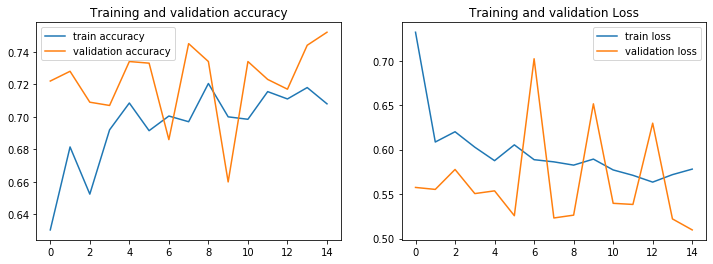

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['acc'], label='train accuracy')
ax1.plot(history.history['val_acc'], label='validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='train loss')
ax2.plot(history.history['val_loss'], label='validation loss')
ax2.set_title('Training and validation Loss')
ax2.legend()

# 왔다갔다하는건 계속 다른 데이터를 넣기 때문이고
# 전체적으로 추세가 같이 움직이기 때문에 굿